##### Load libs:

In [1]:
import pandas as pd
import sqlite3

##### 1.Create connect:

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

##### 2.Load data:

In [ ]:
data = pd.io.sql.read_sql(
    "SELECT " \
        "CASE "  \
            "WHEN CAST(strftime('%w', timestamp) AS INT) BETWEEN 1 AND 5 THEN 'working' " \
            "ELSE 'weekend' " \
        "END AS type, " \
        "CAST(strftime('%H', timestamp) AS INT) AS hour, " \
        "date(timestamp) AS date, " \
        "COUNT(*) AS cnt " \
    "FROM checker " \
    "WHERE uid LIKE 'user_%' " \
    "GROUP BY type, hour, date",
    connect
)

data_avg = data.groupby(['type', 'hour']).agg({'cnt': 'mean'}).reset_index()
data_avg = data_avg.rename(columns={'cnt': 'avg_count'})



data_working = data_avg[data_avg['type']=='working'][['hour', 'avg_count']].rename(columns={'avg_count': 'working_day'})
print(data_working)

data_weekend = data_avg[data_avg['type']=='weekend'][['hour', 'avg_count']].rename(columns={'avg_count': 'weekend'})
print(data_weekend)

    hour  working_day
21     0     3.000000
22     3     2.000000
23     5     7.500000
24     6     1.500000
25     7     5.166667
26     8     3.700000
27     9     6.000000
28    10    13.200000
29    11     6.769231
30    12     7.181818
31    13     8.111111
32    14    10.166667
33    15    12.818182
34    16    18.888889
35    17    16.000000
36    18    15.181818
37    19    17.833333
38    20    14.076923
39    21    24.333333
40    22     3.750000
41    23     5.000000
    hour    weekend
0      0   2.000000
1      1   6.000000
2      3   1.000000
3      5   2.000000
4      7   4.000000
5      8   7.000000
6      9   3.666667
7     10   7.000000
8     11  23.600000
9     12   9.500000
10    13  18.000000
11    14  12.428571
12    15  14.250000
13    16  14.800000
14    17   7.142857
15    18   9.714286
16    19  13.125000
17    20  13.000000
18    21  10.285714
19    22   9.833333
20    23   6.400000


##### 3.Bar charts:

In [ ]:
merged_data.count()

Text(0.5, 0, 'hour')

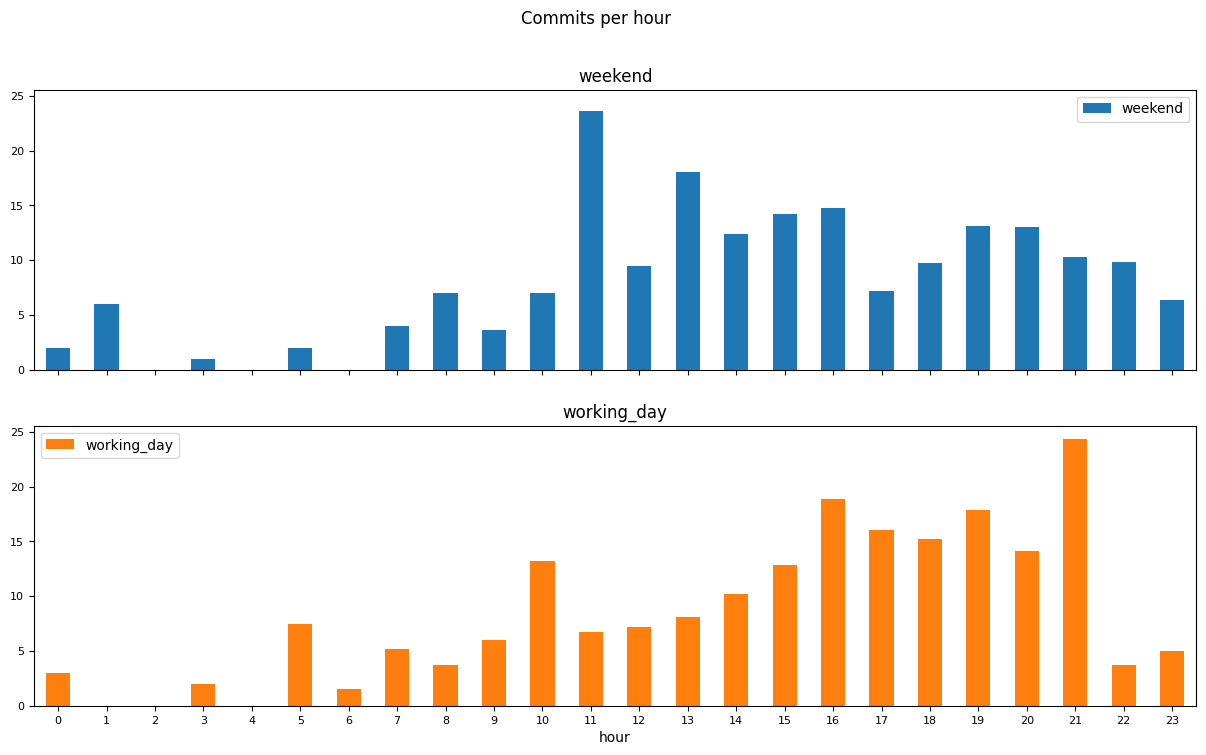

In [4]:
all_hours = pd.DataFrame({'hour': range(24)})

merged_data = pd.merge(all_hours, data_working, on='hour', how='left')
merged_data = pd.merge(merged_data, data_weekend, on='hour', how='left')

merged_data = merged_data.fillna(0)

ax = merged_data.plot(
    kind='bar',
    x='hour',
    y=['weekend','working_day'],
    figsize=(15, 8),
    rot=0,
    subplots=True,
    layout=(2, 1),
    sharey=True,
    fontsize=8,
    title=['weekend', 'working_day']
)

ax[0, 0].figure.suptitle('Commits per hour')
ax[1, 0].set_xlabel('hour')


##### 4.Question:

Отличается ли динамика в рабочие и выходные дни?<br>Ответ: Динамика отличается<br>часы, когда коммитов больше в выходные дни: 1,8,11,12,13,14,15,22,23<br>часы, когда коммитов больше в рабочие дни: 0,3,5,6,7,9,10,16,17,18,19,20,21

##### 5.Close connect:

In [5]:
connect.close()